# TITANIC SURVIVOR PREDICTION- KNN Algorithm

## Defining the question

Given the data, we are to predict whether an individual would survive the Titanic based on the features given in the dataset ie. sex,age.parch etc.

## Metric for success
This project will be considered successful if we are able to create a KNN model that accurately predicts whether an individual would have survived the titanic or not.


## Understanding the context
The Titanic, during her maiden voyage on April 15, 1912, sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. The tragedy is considered one of the most infamous shipwrecks in history and led to better safety guidelines for ships.

We shall analyse the data on passengers aboard the Titanic to build a model that can predict whether a passenger survived or not.

We have two data sets. One for training (train.csv) containing survival and death information that we will use to train our model. One for testing (test.csv), without survival and death information, that we will use to test our models.

## Experimental design
- Defining the Question
- Reading the Data.
- Checking the Data.
- Data Cleaning
- Performing EDA
- Building thePrediction Model

## Definitions of each feature:

**PassengerId:**Unique identification of the passenger. It shouldn't be necessary for the machine learning model.

**Survived:** Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.

**Pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.

**Name:** Name of the passenger. We need to parse before using it.

**Sex:** Gender Categorical variable that should be encoded. We can use dummy -variable to encode it.

**Age:** Age in years.

**SibSp:** Siblings / Spouses aboard the Titanic.

**Parch:** Parents / Children aboard the Titanic.

**Ticket:** Ticket number. Big mess.

**Fare:** Passenger fare.

**Cabin:** Cabin number.

**Embarked:**Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton. Categorical feature that should be encoded. We can use feature mapping or make dummy vairables for it.

## Importing libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Set global parameters
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Reading the data

In [2]:
# reading our csv files
train = pd.read_csv('/content/train (5).csv')
test = pd.read_csv('/content/test (1).csv')

In [3]:
# Creating a copy for test data
test_copy = test.copy(deep = True) 

## Checking the data

In [4]:
# renaming our dataset
titanic = train

In [5]:
# Checking the shape of our dataset
titanic.shape

(891, 12)

Our dataset has 891 observations and 12 columns.

In [6]:
# checking the top of our dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# checking the bottom of our dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# checking the data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Tidying the data

In [9]:
# making our columns uniform
titanic.columns = titanic.columns.str.lower()
test.columns = test.columns.str.lower()

In [10]:
# Check the unique values in each column
for i in titanic.columns:
  print(f'Column: {i} \n') 
  print(titanic[i].unique())
  print("\n")

Column: passengerid 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 

In [11]:
# Checking for null values
titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Null-values are present in Age, Cabin and Embarked columns. In Age, there are about 177 null values, 687 in Cabin and 2 in Embarked

The cabin column contains > 77% of null observations. We will drop this column.

In [12]:
# Dropping cabin column
titanic.drop( columns=['cabin'],inplace = True)

In [13]:
test.drop( columns=['cabin'],inplace = True)

In [14]:
# Summary Statistics of the data
titanic.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above summary statistics we can see that age does not have any outliers.

In [15]:
# Replacing the null values in age column with the mean
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

In [16]:
test['age'] = test['age'].fillna(test['age'].mean())

In [17]:
# dealing with null values in embarked column
# There are only 2 null values. We will drop this 2 observations
titanic.dropna(inplace=True)

In [18]:
test.dropna(inplace=True)

In [19]:
# checking to see if all null values have been dealt with
titanic.isnull().sum().sum()

0

Our null values have been dealt with.

In [20]:
# Checking for duplicates
titanic.duplicated().sum()

0

There are no duplicates within our dataset.

Which features are:

**Categorical ?** Survived,Sex,Embarked

**Ordinal?** Pclass.

**Numerical?** Age (Continuous),Fare (Continuous),SibSp (Discrete),Parch (Discrete)

In [21]:
#Convert the relevant data types to categorical

# Creating a list of the numerical columns in the dataset.
#numeric = ['age', 'fare', 'sibsp', 'parch']

#categorical = ['survived','pclass','sex','embarked']

#objects = ['name']

#for i in titanic.columns:
 #  if i in numeric:
  #     titanic[i]=pd.to_numeric(titanic[i])
 #  elif i in categorical:
   #     titanic[i]=titanic[i].astype('category')

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  889 non-null    int64  
 1   survived     889 non-null    int64  
 2   pclass       889 non-null    int64  
 3   name         889 non-null    object 
 4   sex          889 non-null    object 
 5   age          889 non-null    float64
 6   sibsp        889 non-null    int64  
 7   parch        889 non-null    int64  
 8   ticket       889 non-null    object 
 9   fare         889 non-null    float64
 10  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


(889, 11)


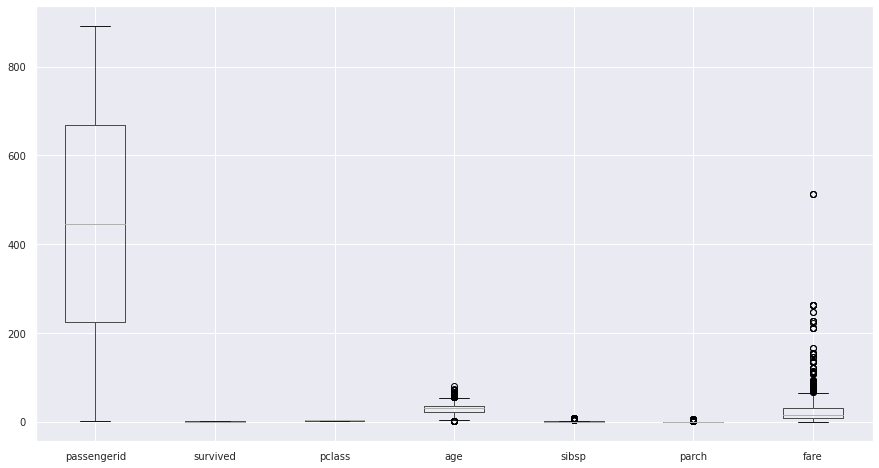

In [23]:
# Checking for outliers
# Checking for outliers using boxplots
titanic.boxplot(figsize=(15, 8), fontsize=10)

# print size of the data with outliers present
print(titanic.shape)

Age and Fare seem to have outliers. 

We will not drop these outliers as they could be viable for our analysis.

## Exploratory Analysis

In [24]:
# Checking the frequency of the survived column
titanic.survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: survived, dtype: float64

61% of the passengers did not survive.
38% of the passengers survived.

This shows there is an imbalance between the classes.

Women and children were given priority on the lifeboats, according to historical records. Was this true, and did it affect their chances of survival? Let's take a closer look.

In [25]:
# Lets look at survival rate by sex
print('Survival Rate by Sex')
print(titanic['survived'].groupby(titanic['sex']).mean())
print('\n\nSex Ratio of individuals')
print(titanic['sex'].value_counts(normalize=True))

Survival Rate by Sex
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


Sex Ratio of individuals
male      0.649044
female    0.350956
Name: sex, dtype: float64


Despite accounting for only 35% of the total passengers, 72 percent of the female passengers survived. Women did, in fact, have a higher survival rate than men.

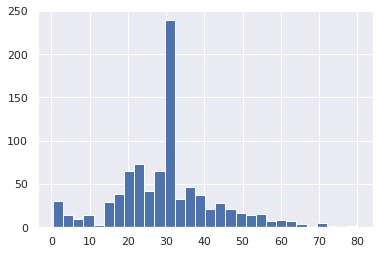

In [26]:
# plotting the passenger age historgram.
hist = titanic['age'].hist(bins=30)

Most of the pasengers are in their twenties and thirties. There are lots of children too as compared to the elderly.

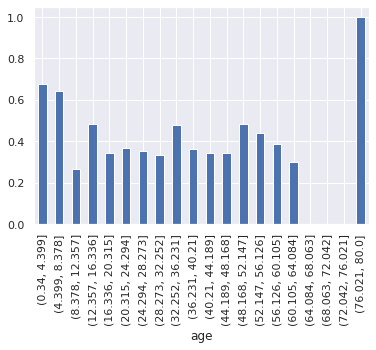

In [27]:
# survival rate by age
titanic['survived'].groupby(pd.cut(titanic['age'], 20)).mean().plot(kind='bar')

Children appear to have a higher survival rate. The ship's few elderly passengers also survived.

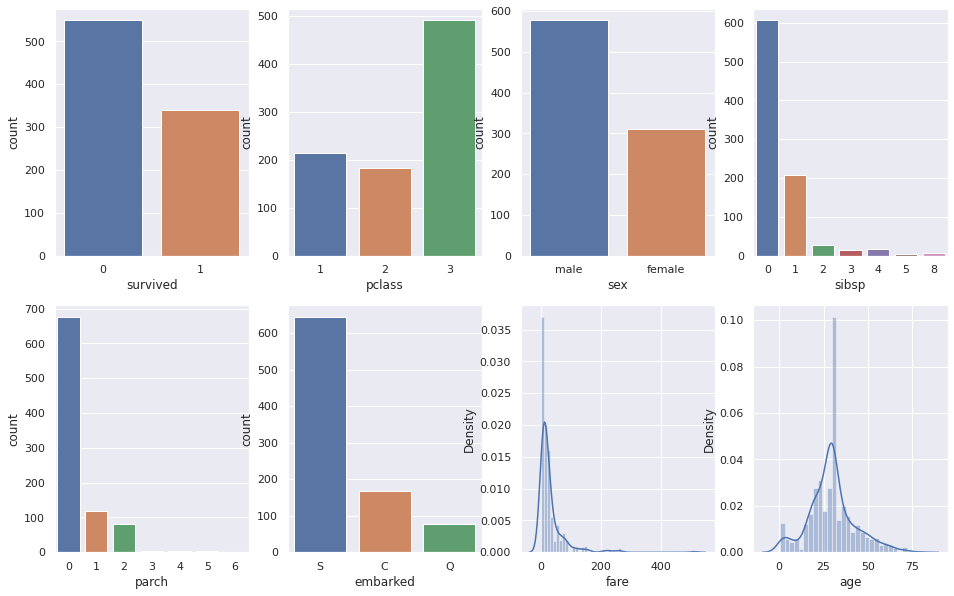

In [28]:
# plotting count plots of our features
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('survived',data=titanic,ax=axes[0,0])
sns.countplot('pclass',data=titanic,ax=axes[0,1])
sns.countplot('sex',data=titanic,ax=axes[0,2])
sns.countplot('sibsp',data=titanic,ax=axes[0,3])
sns.countplot('parch',data=titanic,ax=axes[1,0])
sns.countplot('embarked',data=titanic,ax=axes[1,1])
sns.distplot(train['fare'], kde=True,ax=axes[1,2])
sns.distplot(train['age'],kde=True,ax=axes[1,3])

<Figure size 480x320 with 0 Axes>

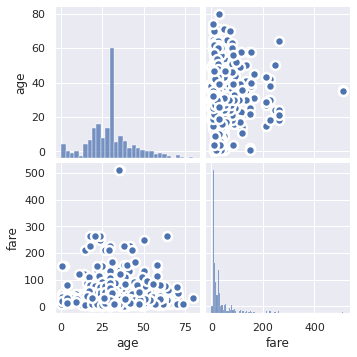

In [29]:
# plotting pairplots
plt.figure(dpi= 80)
sns.pairplot(titanic[['age','fare']], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


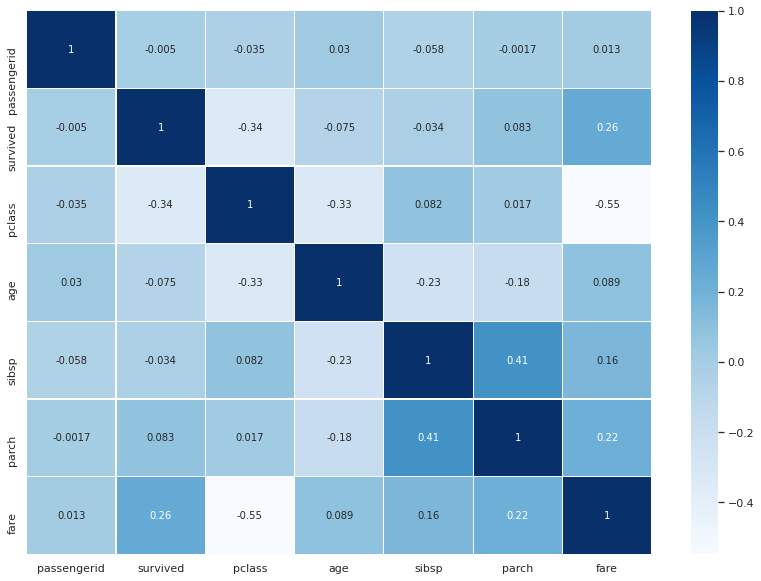

In [30]:
# correlation 
# Ploting a heatmat
# using seaborn 
# 
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)

There is a negative correlation between pclass and survived.

There is a positive correlation between survived and fare.


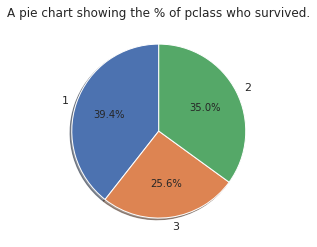

In [31]:
# analyzing the Pclass column since it is correlated with the target variable.
titanic2 = titanic[titanic['survived']== 1]
explode = [0,0,0]
p = titanic2.groupby('pclass')['survived'].value_counts()

labels = titanic2['pclass'].unique()

plt.title('A pie chart showing the % of pclass who survived.')
plt.pie(p,labels=labels,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True);

When compared to other classes of passengers, first-class passengers had the highest survival rate.

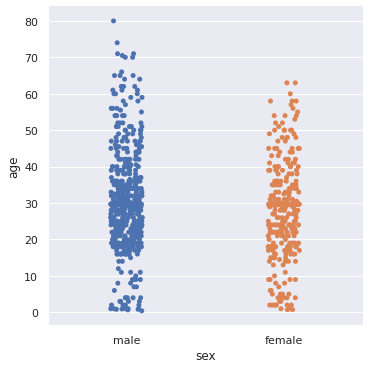

In [32]:
# Comparing sex and age
sns.catplot(x='sex', y='age', data=titanic)

Some very old men were travelling compared to women.

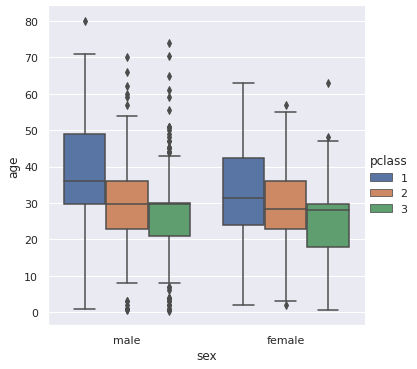

In [33]:
# Comparing sex and age and pclass
sns.catplot(x='sex', y='age', data=titanic, kind='box', hue='pclass')

The majority of the older passengers were traveling first class.

The younger passengers, aged 25 to 35, were mostly in the second and  those aged between 20 and 30 are in the third classes.

## Feature Engineering

In [34]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Let us engineer some new features from the dataset to make our predictions more accurate. 

In [35]:
# extracting the first, last names and the title from the "name" column.
titanic['first name'] = titanic['name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a df instead of series
titanic['first name'] = titanic['first name'].str.strip() #strip leading and trailing white spaces
titanic['last name'] = titanic['name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a df instead of series
titanic['last name'] = titanic['last name'].str.strip()
titanic['title'] = titanic['name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a df instead of series
titanic['title'] = titanic['title'].str.strip()

titanic['title'].value_counts() # displaying the name column summary

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Mme               1
Jonkheer          1
Lady              1
Ms                1
Capt              1
the Countess      1
Sir               1
Name: title, dtype: int64

In [36]:
test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [37]:
# extracting the first, last names and the title from the "name" column. test dataset
test['first name'] = test['name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a df instead of series
test['first name'] = test['first name'].str.strip() #strip leading and trailing white spaces
test['last name'] = test['name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a df instead of series
test['last name'] = test['last name'].str.strip()
test['title'] = test['name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a df instead of series
test['title'] = test['title'].str.strip()

The titles gathered from the "name" column are displayed. Aside from the common titles, there are some religious titles ("Rev"), noble titles ("Jonkheer", "Don", and so on), and military titles ("Jonkheer", "Don", and so on) ("Capt", etc). We'll categorize these titles based on their social standing. Our intuition is that a person's social status has an effect on their survival rate and, when used, can improve our prediction accuracy.

In [38]:
# Creating a new column 'status' to our dataset

# Creating a dictionary with the titles and their social status position
status={'Capt':'Military',
            'Col':'Military',
            'Don':'Noble',
            'Dona':'Noble',
            'Dr':'Dr',
            'Jonkheer':'Noble',
            'Lady':'Noble',
            'Major':'Military',
            'Master':'Common',
            'Miss':'Common',
            'Mlle':'Common',
            'Mme':'Common',
            'Mr':'Common',
            'Mrs':'Common',
            'Ms':'Common',
            'Rev':'Clergy',
            'Sir':'Noble',
            'the Countess':'Noble',
            }

titanic['social status'] = titanic['title'].map(status)
test['social status'] = test['title'].map(status)
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,first name,last name,title,social status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Owen Harris,Braund,Mr,Common
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,John Bradley (Florence Briggs Thayer),Cumings,Mrs,Common
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,Heikkinen,Miss,Common
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Jacques Heath (Lily May Peel),Futrelle,Mrs,Common
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,William Henry,Allen,Mr,Common


In [39]:
# What about the family's size? Would a larger family stand a better chance of survival?
titanic['family_members'] = titanic['parch'] + titanic['sibsp']
test['family_members'] = test['parch'] + test['sibsp']

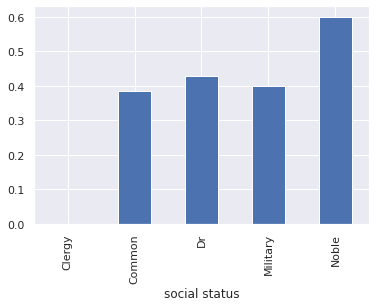

In [40]:
# Lets check if the new features had an effect on whether an individual survived.
titanic['survived'].groupby(titanic['social status']).mean().plot(kind='bar')

So, it appears that if you are a noble, you have a good chance of survival. If you are a member of the clergy, you may have stayed behind.

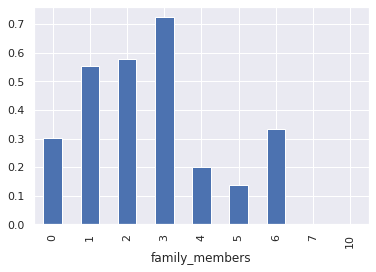

In [41]:
# Lets check family size
titanic['survived'].groupby(titanic['family_members']).mean().plot(kind='bar')


So it appears that smaller families survived at a higher rate, with parents most likely leaving with their children. Single passengers most likely stayed behind. Larger families have a lower rate of survival. Perhaps they couldn't all fit into a single lifeboat and chose to remain together behind.

In [42]:
# dropping columns we will not need 
titanic.drop(['name','first name','last name','sibsp','parch','passengerid','ticket'],axis=1,inplace=True)
test.drop(['name','first name','last name','sibsp','parch','passengerid','ticket'],axis=1,inplace=True)

## Implement the solution

In [43]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,title,social status,family_members
0,0,3,male,22.0,7.2500,S,Mr,Common,1
1,1,1,female,38.0,71.2833,C,Mrs,Common,1
2,1,3,female,26.0,7.9250,S,Miss,Common,0
3,1,1,female,35.0,53.1000,S,Mrs,Common,1
4,0,3,male,35.0,8.0500,S,Mr,Common,0


In [44]:
# removing the title column because the social status column represents the title's status
titanic.drop(['title'],axis=1,inplace=True)

In [45]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,social status,family_members
0,0,3,male,22.0,7.2500,S,Common,1
1,1,1,female,38.0,71.2833,C,Common,1
2,1,3,female,26.0,7.9250,S,Common,0
3,1,1,female,35.0,53.1000,S,Common,1
4,0,3,male,35.0,8.0500,S,Common,0


In [46]:
test.drop(['title'],axis=1,inplace=True)

In [47]:
# Encode sex and embarked features
titanic['sex'] = titanic.sex.map({'male':0, 'female':1})
titanic['embarked'] = titanic.embarked.map({'C':0,'S':1,'Q':2})

test['sex'] = test.sex.map({'male':0, 'female':1})
test['embarked'] = test.embarked.map({'C':0,'S':1,'Q':2})

In [48]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
titanic['social_status'] = labelencoder.fit_transform(titanic['social status'])
titanic.drop(['social status'],axis=1,inplace=True)

# Assigning numerical values and storing in another column
test['social_status'] = labelencoder.fit_transform(test['social status'])
test.drop(['social status'],axis=1,inplace=True)

titanic.head()

,survived,pclass,sex,age,fare,embarked,family_members,social_status
0,0,3,0,22.0,7.2500,1,1,1
1,1,1,1,38.0,71.2833,0,1,1
2,1,3,1,26.0,7.9250,1,0,1
3,1,1,1,35.0,53.1000,1,1,1
4,0,3,0,35.0,8.0500,1,0,1


In [49]:
# encode our test dataset
test.isnull().sum()

pclass            0
sex               0
age               0
fare              0
embarked          0
family_members    0
social_status     0
dtype: int64

## Modelling 

**80/20 Split**

In [50]:
# Declaring our X and y variables
# 
X = titanic.drop('survived', axis=1)
y = titanic.survived

# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = classifier.predict(X_train)

Accuracy score: 0.7134831460674157 ,f1 score = 0.6165413533834587
[[86 19]
 [32 41]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       105
           1       0.68      0.56      0.62        73

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.69       178
weighted avg       0.71      0.71      0.71       178



Text(0, 0.5, 'Mean Error')

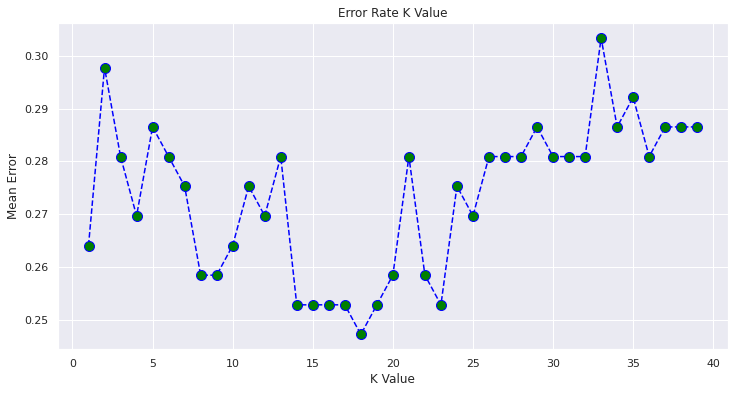

In [51]:
# Plotting the k value graph and its reeor rate for our dataset.

# plotting the mean error for the predicted values of test set for all the K values between 1 and 40.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



From the output we can see that the mean error is zero when the value of the K is 18. This is the value we will apply when we find best params.

**70/30 Split**

In [52]:
# Declaring our X and y variables
# 
X = titanic.drop('survived', axis=1)
y = titanic.survived

# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = classifier.predict(X_train)

Accuracy score: 0.7640449438202247 ,f1 score = 0.6926829268292682
[[133  24]
 [ 39  71]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.75      0.65      0.69       110

    accuracy                           0.76       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



Text(0, 0.5, 'Mean Error')

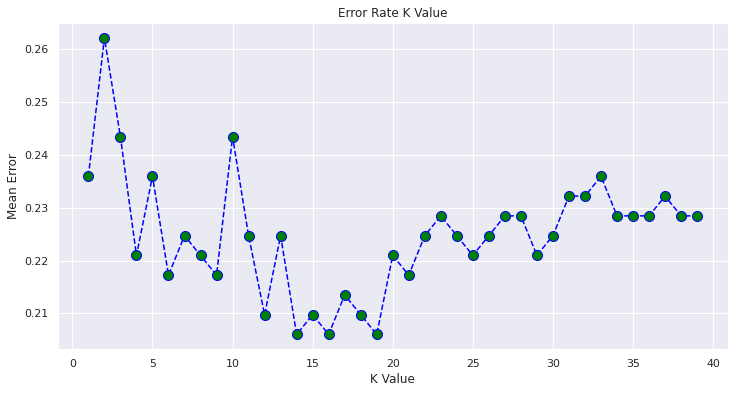

In [53]:
# Plotting the k value graph and its reeor rate for our dataset.

# plotting the mean error for the predicted values of test set for all the K values between 1 and 40.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



**60/40 Split**

In [54]:
# Declaring our X and y variables
# 
X = titanic.drop('survived', axis=1)
y = titanic.survived

# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = classifier.predict(X_train)

Accuracy score: 0.7724719101123596 ,f1 score = 0.7011070110701106
[[180  36]
 [ 45  95]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       216
           1       0.73      0.68      0.70       140

    accuracy                           0.77       356
   macro avg       0.76      0.76      0.76       356
weighted avg       0.77      0.77      0.77       356



Text(0, 0.5, 'Mean Error')

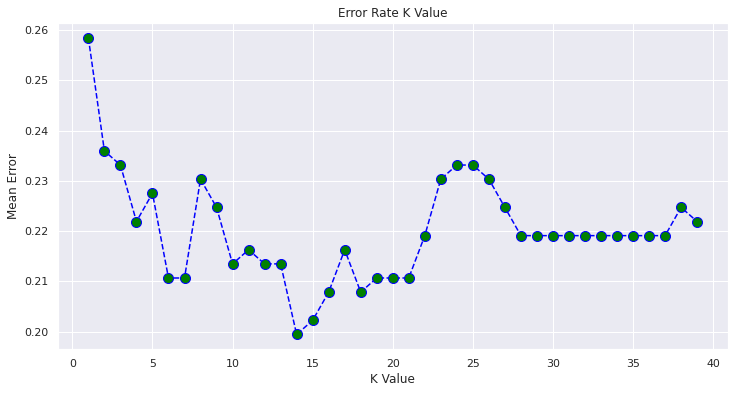

In [55]:
# Plotting the k value graph and its reeor rate for our dataset.

# plotting the mean error for the predicted values of test set for all the K values between 1 and 40.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



Accuracy Scores:
- 80/20: **71.34%**
- 70/30: **76.40%**
- 60/40: **77.25%**

The 60/40 split KNN model performed the best. We will perform hyperparameter tuning on it.


## Hyperparameter Tuning

In [56]:
# Let's see the parameters to tune
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# defining the parameter values that should be searched
k_range = list(range(1, 51))

# Another parameter besides k that we might vary is the weights parameters
leaf_size = list(range(1,50))
# create a list
weight_options = ['uniform', 'distance']

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options, leaf_size=leaf_size)

# instantiate model
# 2 new params
# random_state for reproducibility 
knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand.fit(X, y)


# examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.7333886618998978
{'weights': 'distance', 'n_neighbors': 40, 'leaf_size': 41}
KNeighborsClassifier(algorithm='auto', leaf_size=41, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='distance')


In [58]:
# Train Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=41, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='distance')
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.7865168539325843 ,f1 score = 0.7205882352941176
[[182  34]
 [ 42  98]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       216
           1       0.74      0.70      0.72       140

    accuracy                           0.79       356
   macro avg       0.78      0.77      0.77       356
weighted avg       0.78      0.79      0.79       356



After tuning our parameters the model performed better yielding an accuracy score of 78.65% from 77.25%.

## Challenge the solution

In [59]:
# Let's challenge our solution with LDA

# Train Test Split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=41, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='distance')
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score: 0.7584269662921348 ,f1 score = 0.6766917293233082
[[90 15]
 [28 45]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       105
           1       0.75      0.62      0.68        73

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.74       178
weighted avg       0.76      0.76      0.75       178



We discovered that reducing the number of features in our model does not improve accuracy; in fact, it results in a lower score, so our model performs well as is.

## Predicting the Test dataset

We will predict our test set using the 60/40 model because it produced the highest accuracy.

In [60]:
test.head()

,pclass,sex,age,fare,embarked,family_members,social_status
0,3,0,34.5,7.8292,2,0,1
1,3,1,47.0,7.0000,1,1,1
2,2,0,62.0,9.6875,2,0,1
3,3,0,27.0,8.6625,1,0,1
4,3,1,22.0,12.2875,1,2,1


In [61]:
# Declaring our X and y variables
# 
X_train = titanic.drop('survived', axis=1)
y_train = titanic.survived
X_test = test.copy(deep=True)

In [62]:
# let's predict the test data
clf_knn = KNeighborsClassifier(algorithm='auto', leaf_size=41, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='distance')

clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

In [64]:
test_copy.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
# let us create a series object to hold our prediction array 
predict = pd.Series(clf_knn.predict(X_test), name='Survived')

# let us source passenger Id from our original test data
PassId = test_copy['PassengerId']

# le us create a dataframe to hold our predictions
result = pd.concat([PassId, predict], axis=1)
result.sample(5)

,PassengerId,Survived
361,1253,0.0
179,1071,0.0
147,1039,0.0
165,1057,1.0
141,1033,1.0


In [66]:
# let's export our prediction dataset to csv
result.to_csv('Titanic_Dataset.csv', index=False)

## Conclusion

The KNN split model with a 60/40 split performed well. This is the model we will use for future predictions. We could, however, fine-tune the model to achieve an accuracy of 80% or higher. We could do a lot more feature engineering.